# K-means Clustering practice

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#most of this relies on sklearn and its packages 
import sklearn 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
# The iris data is used for the model
from sklearn import datasets
# The confuse matrix is used to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
#setting the ploting parameters 
%matplotlib inline
plt.rcParams['figure.figsize']=7,4

In [44]:
# Loading the data 
iris=datasets.load_iris()

x=scale(iris.data)

y=pd.DataFrame(iris.target)

variable_names=iris.feature_names


In [45]:
# creating the actual model
# n_clusters refer to the number of centriods 
# Here the number of centroid is 3, as we already know that there are 3 speices
# random_state is used to seed the position of the centroids in order to get the same for replicability
clustering=KMeans(n_clusters=3, random_state=5)
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [46]:
#ploting the model output 
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.colums = ['Targets']

C:\Users\Rimna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


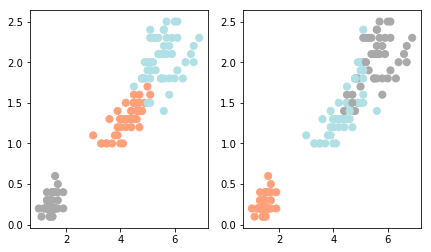

In [47]:
color_theme=np.array(['darkgray','lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)

Text(0.5, 1.0, 'K-Means Classification')

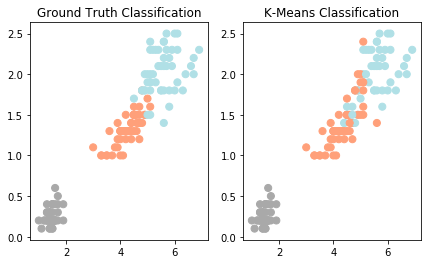

In [52]:
# to change the position of the colors 
relabel=np.choose(clustering.labels_, [2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')


In [51]:
print (classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

   micro avg       0.83      0.83      0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

